In [1]:
import autorootcwd  # noqa

import json
import os
import pandas as pd


os.getcwd()

'/Users/gustavosantos/code/spotify-wrapped'

In [2]:
with open("data/Streaming_History_Audio_2023-2024_8.json") as file:
    data_2324 = json.load(file)

with open("data/Streaming_History_Audio_2024-2025_9.json") as file:
    data_2425 = json.load(file)

df_2324 = pd.DataFrame(data_2324)
df_2425 = pd.DataFrame(data_2425)

df_complete = pd.concat([df_2324, df_2425]).reset_index(drop=True)

print("Number of rows in 2023-2024 data:", len(df_2324))
print("Number of rows in 2024-2025 data:", len(df_2425))
print("Number of rows in combined data:", len(df_complete))

Number of rows in 2023-2024 data: 16043
Number of rows in 2024-2025 data: 9038
Number of rows in combined data: 25081


In [3]:
print(data_2324[0]["ts"])

2023-02-24T19:14:05Z


In [4]:
df_2024 = df_complete[df_complete["ts"].str.contains("2024")].reset_index(drop=True)

In [5]:
df_2024["ts"] = pd.to_datetime(df_2024["ts"])
df_2024["date"] = df_2024["ts"].dt.date

In [6]:
df_subset = df_2024[df_2024["ts"].between("2024-01-01", "2024-01-07")].reset_index(
    drop=True
)

In [7]:
df_subset.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'date'],
      dtype='object')

In [8]:
df_subset["cum_plays"] = df_subset.reset_index(drop=False)["index"] + 1

In [9]:
df_subset.groupby(df_subset["ts"].dt.date)["cum_plays"].max()

ts
2024-01-02     57
2024-01-03     68
2024-01-04     93
2024-01-05    112
Name: cum_plays, dtype: int64

In [11]:
df_complete["ts"] = pd.to_datetime(df_complete["ts"])

In [15]:
df_complete["year"] = df_complete["ts"].dt.year
df_complete["month"] = df_complete["ts"].dt.month

In [16]:
df_complete.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year,month
0,2023-02-24 19:14:05+00:00,windows,266080,BR,161.22.56.161,Doves In The Wind (feat. Kendrick Lamar),SZA,Ctrl,spotify:track:593W4qZOwwdqF6YnimJjL6,None,...,None,trackdone,trackdone,True,False,False,1.677266e+09,False,2023,2
1,2023-02-24 19:16:11+00:00,windows,129288,BR,161.22.56.161,big daddy ya,Yaya Bey,Remember Your North Star,spotify:track:5LUqDKwcT3sT2yDRRmKTwd,None,...,None,trackdone,trackdone,True,False,False,1.677266e+09,False,2023,2
2,2023-02-24 19:19:37+00:00,windows,209454,BR,161.22.56.161,Found (feat. Brent Faiyaz),Tems,Found (feat. Brent Faiyaz),spotify:track:0GGfGINoVYiSFXPOjg3RHj,None,...,None,trackdone,trackdone,True,False,False,1.677266e+09,False,2023,2
3,2023-02-24 19:22:12+00:00,windows,157866,BR,161.22.56.161,Forgive Me,Chloe x Halle,Ungodly Hour,spotify:track:0qU3XhIH9xczYPUWV6OopS,None,...,None,trackdone,trackdone,True,False,False,1.677266e+09,False,2023,2
4,2023-02-24 19:24:15+00:00,windows,125973,BR,161.22.56.161,pour up,Yaya Bey,Remember Your North Star,spotify:track:0NzTOeYLPLOGFL40dOX3ho,None,...,None,trackdone,trackdone,True,False,False,1.677267e+09,False,2023,2


In [24]:
group = (
    df_complete.groupby(["year", "month"])["ms_played"]
    .sum()
    .reset_index(drop=False)
    .groupby("month")["ms_played"]
    .mean()
)
group

month
1     150774154.0
2     140348611.0
3     277392154.5
4     261730676.5
5     247232037.0
6     202574255.0
7     187802811.0
8     197396416.0
9     179027437.0
10    205585170.5
11    175558733.5
12    207260551.5
Name: ms_played, dtype: float64

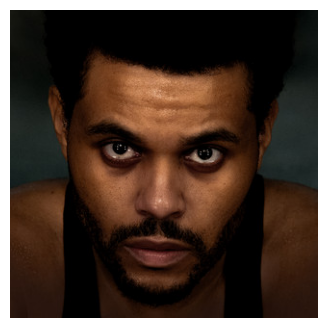

In [8]:
import matplotlib.pyplot as plt  # noqa
import requests
from PIL import Image
from io import BytesIO

from src.utils.api_calls import get_artist_info, get_spotify_token

token = get_spotify_token()
artist_id = "1Xyo4u8uXC1ZmMpatF05PJ"

info = get_artist_info(artist_id, token)

image = info["images"][1]["url"]

# Fetch the image
response = requests.get(image)

if response.status_code == 200:
    # Convert the image to a PIL Image
    image = Image.open(BytesIO(response.content))

    # Display the image using Matplotlib
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis("off")  # Hide axis
    plt.show()
else:
    print("Failed to fetch image:", response.status_code)